# 탐색적 분석

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

from pandas.plotting import scatter_matrix

## 자신의 드라이브에서 파일 읽기
- 구글 드라이브 마운트 실행

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_tr_lbl = pd.read_csv('/content/drive/My Drive/PM_train.csv')
df_tr_lbl.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,av1,av2,av3,av4,av5,av6,av7,av8,av9,av10,av11,av12,av13,av14,av15,av16,av17,av18,av19,av20,av21,sd1,sd2,sd3,sd4,sd5,sd6,sd7,sd8,sd9,sd10,sd11,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,518.67,641.820000,1589.700000,1400.600000,14.62,21.61,554.360000,2388.0600,9046.190000,1.3,47.470,521.660,2388.020,8138.620000,8.419500,0.03,392.000000,2388.0,100.0,39.060000,23.419000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,518.67,641.985000,1590.760000,1401.870000,14.62,21.61,554.055000,2388.0500,9045.130000,1.3,47.480,521.970,2388.045,8135.055000,8.425650,0.03,392.000000,2388.0,100.0,39.030000,23.421300,0.0,0.233345,1.499066,1.796051,0.0,0.0,0.431335,0.014142,1.499066,0.0,0.014142,0.438406,0.035355,5.041671,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,518.67,642.106667,1589.836667,1402.646667,14.62,21.61,554.123333,2388.0600,9047.733333,1.3,47.410,522.120,2388.040,8134.446667,8.423033,0.03,391.333333,2388.0,100.0,39.003333,23.395600,0.0,0.267644,1.918654,1.850009,0.0,0.0,0.327159,0.020000,4.632023,0.0,0.121655,0.404475,0.026458,3.717450,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,518.67,642.167500,1588.075000,1402.452500,14.62,21.61,554.205000,2388.0725,9048.170000,1.3,47.340,522.305,2388.050,8134.292500,8.409325,0.03,391.500000,2388.0,100.0,38.972500,23.390175,0.0,0.250117,3.855909,1.559645,0.0,0.0,0.313103,0.029861,3.881555,0.0,0.171659,0.495950,0.029439,3.050906,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,518.67,642.208000,1587.030000,1403.206000,14.62,21.61,554.164000,2388.0700,9049.566000,1.3,47.328,522.282,2388.048,8134.194000,8.413340,0.03,391.800000,2388.0,100.0,38.958000,23.393020,0.0,0.234776,4.075678,2.159440,0.0,0.0,0.286234,0.026458,4.587366,0.0,0.151063,0.432574,0.025884,2.651326,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0


In [0]:
featurs = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

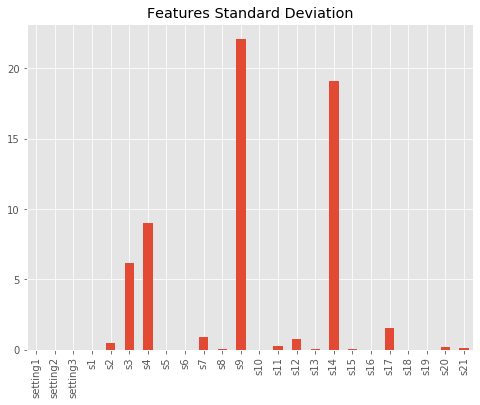

In [0]:
# 해당 특성들의 표준 편차를 확인
df_tr_lbl[featurs].std().plot(kind='bar', 
    figsize=(8,6), title="Features Standard Deviation")

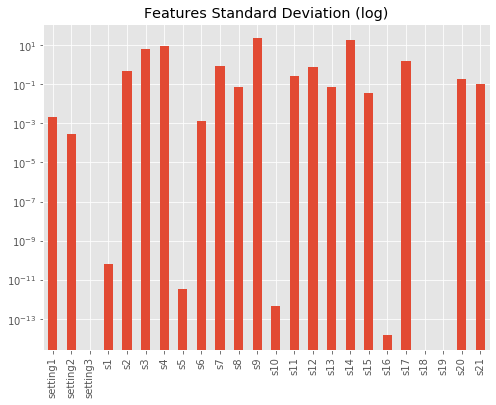

In [0]:
# 표준편차의 로그값을 비교
df_tr_lbl[featurs].std().plot(kind='bar', 
  figsize=(8,6), logy=True,title="Features Standard Deviation (log)")

In [0]:
# 값이 큰 순서로 소팅

featurs_top_var = df_tr_lbl[featurs].std().sort_values(ascending=False)
featurs_top_var

s9          2.208288e+01
s14         1.907618e+01
s4          9.000605e+00
s3          6.131150e+00
s17         1.548763e+00
s7          8.850923e-01
s12         7.375534e-01
s2          5.000533e-01
s11         2.670874e-01
s20         1.807464e-01
s21         1.082509e-01
s13         7.191892e-02
s8          7.098548e-02
s15         3.750504e-02
setting1    2.187313e-03
s6          1.388985e-03
setting2    2.930621e-04
s1          6.537152e-11
s5          3.394700e-12
s10         4.660829e-13
s16         1.556432e-14
s18         0.000000e+00
s19         0.000000e+00
setting3    0.000000e+00
dtype: float64

In [0]:
# ttf와의 상관관계가 큰 순으로 소팅
df_tr_lbl[featurs].corrwith(df_tr_lbl.ttf).sort_values(ascending=False)

s12         6.719831e-01
s7          6.572227e-01
s21         6.356620e-01
s20         6.294285e-01
s16        -3.969701e-16
s5         -3.969701e-16
setting2   -1.947628e-03
setting1   -3.198458e-03
s6         -1.283484e-01
s14        -3.067689e-01
s9         -3.901016e-01
s13        -5.625688e-01
s8         -5.639684e-01
s3         -5.845204e-01
s17        -6.061536e-01
s2         -6.064840e-01
s15        -6.426670e-01
s4         -6.789482e-01
s11        -6.962281e-01
setting3             NaN
s1                   NaN
s10                  NaN
s18                  NaN
s19                  NaN
dtype: float64

In [0]:
# 상관관계가 낮은 특성들의 리스트, 향후에 삭제할 대상

low_cor_featrs = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting2', 'setting1']
df_tr_lbl[low_cor_featrs].describe()

,setting3,s1,s10,s18,s19,s16,s5,setting2,setting1
count,20631.0,2.063100e+04,2.063100e+04,20631.0,20631.0,2.063100e+04,2.063100e+04,20631.000000,20631.000000
mean,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000002,-0.000009
std,0.0,6.537152e-11,4.660829e-13,0.0,0.0,1.556432e-14,3.394700e-12,0.000293,0.002187
min,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,-0.000600,-0.008700
25%,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,-0.000200,-0.001500
50%,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000000,0.000000
75%,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000300,0.001500
max,100.0,5.186700e+02,1.300000e+00,2388.0,100.0,3.000000e-02,1.462000e+01,0.000600,0.008700


In [0]:
# ttf와의 상관관계가 큰 특성 리스트, 향후 특성 선택에 사용
correl_featurs = ['s12', 's7', 's21', 's20', 's6', 's14', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']
df_tr_lbl[correl_featurs].describe()

,s12,s7,s21,s20,s6,s14,s9,s13,s8,s3,s17,s2,s15,s4,s11
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,521.413470,553.367711,23.289705,38.816271,21.609803,8143.752722,9065.242941,2388.096152,2388.096652,1590.523119,393.210654,642.680934,8.442146,1408.933782,47.541168
std,0.737553,0.885092,0.108251,0.180746,0.001389,19.076176,22.082880,0.071919,0.070985,6.131150,1.548763,0.500053,0.037505,9.000605,0.267087
min,518.690000,549.850000,22.894200,38.140000,21.600000,8099.940000,9021.730000,2387.880000,2387.900000,1571.040000,388.000000,641.210000,8.324900,1382.250000,46.850000
25%,520.960000,552.810000,23.221800,38.700000,21.610000,8133.245000,9053.100000,2388.040000,2388.050000,1586.260000,392.000000,642.325000,8.414900,1402.360000,47.350000
50%,521.480000,553.440000,23.297900,38.830000,21.610000,8140.540000,9060.660000,2388.090000,2388.090000,1590.100000,393.000000,642.640000,8.438900,1408.040000,47.510000
75%,521.950000,554.010000,23.366800,38.950000,21.610000,8148.310000,9069.420000,2388.140000,2388.140000,1594.380000,394.000000,643.000000,8.465600,1414.555000,47.700000
max,523.380000,556.060000,23.618400,39.430000,21.610000,8293.720000,9244.590000,2388.560000,2388.560000,1616.910000,400.000000,644.530000,8.584800,1441.490000,48.530000


## 상관관계 히트맵

In [0]:
correl_featurs_lbl = correl_featurs + ['ttf']

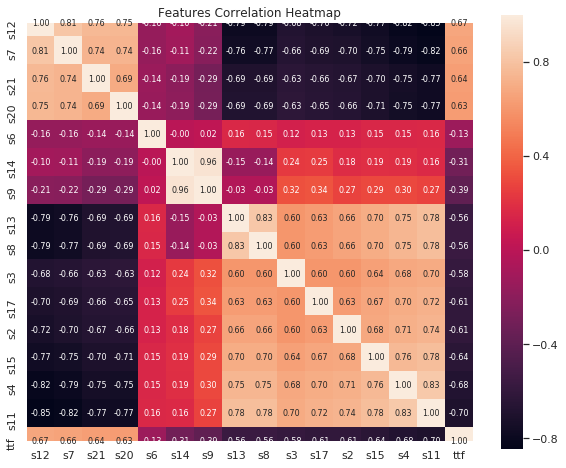

In [0]:
# plot a heatmap to display +ve and -ve correlation among features and regression label:

import seaborn as sns
cm = np.corrcoef(df_tr_lbl[correl_featurs_lbl].values.T)
sns.set(font_scale=1.0)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
  annot_kws={'size': 8}, yticklabels=correl_featurs_lbl, xticklabels=correl_featurs_lbl)
plt.title('Features Correlation Heatmap')
plt.show()

### 높은 상관관계를 갖는 특성들(> 0.8): (s14, s9), (s11, s4), (s11, s7), (s11, s12), (s4, s12), (s8,s13),  (s7, s12)  
- 이들은 향후 특성 선택에서 제거 대상이 될 수 있다.

In [0]:
# sns를 원리 테마로 설정
sns.reset_orig()

/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  

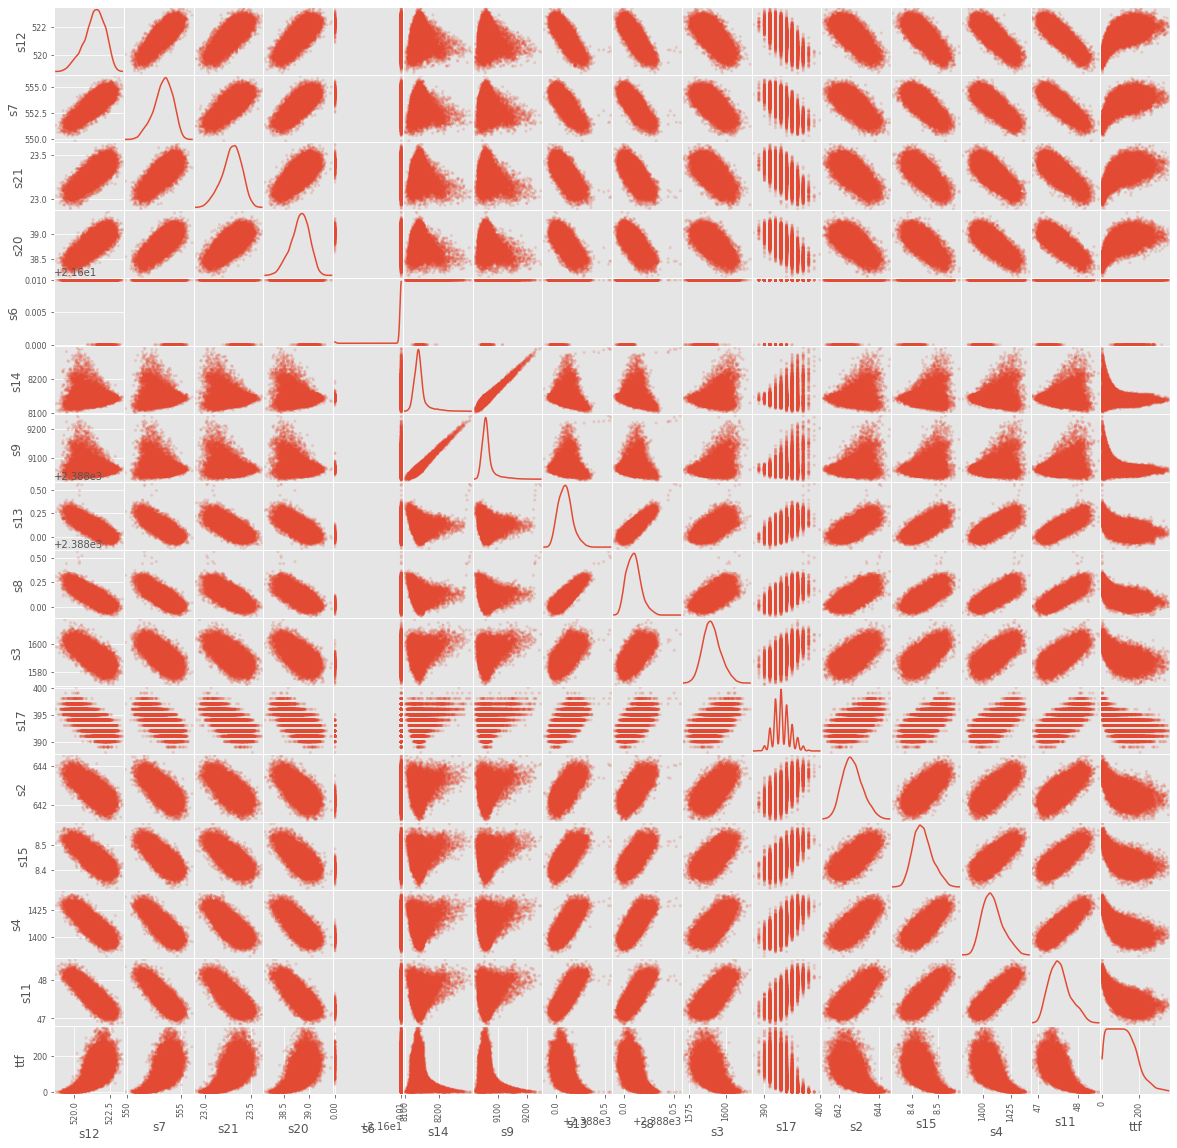

In [0]:
# 산포도 매트릭스 그리기
scatter_matrix(df_tr_lbl[correl_featurs_lbl], 
    alpha=0.2, figsize=(20, 20), diagonal='kde')
plt.show()

- 대부분의 특성은 정규 분포를 갖는 것으로 보인다.
- ttf와 선형적인 관계를 보이지 않는다. 다항(polynomial) 모델을 적용해보겠다.

- 각 특성의 분포를 파악하는 함수 정의

In [0]:
def explore_col(s, e): 
    """ 네가지 함수 그리기
    
        plot1: histogram 
        plot2: boxplot 
        plot3: line plot (time series over cycle)
        plot4: scatter plot vs. regression label ttf
        
    Args:
        s (str): 특성 이름
        e (int): plot3에서 그릴, 임의의 랜덤 엔진 숫자. (1~100)

    Returns:
        plots
    
    """
    fig = plt.figure(figsize=(10, 8))
    sub1 = fig.add_subplot(221) 
    sub1.set_title(s +' histogram') 
    sub1.hist(df_tr_lbl[s])

    sub2 = fig.add_subplot(222)
    sub2.set_title(s +' boxplot')
    sub2.boxplot(df_tr_lbl[s])
    
    #np.random.seed(12345)
    # plot()으로 그릴 엔진 선택
    if e > 100 or e <= 0:  # 모든 엔진 선택
        select_engines = list(pd.unique(df_tr_lbl.id))
    else:
        select_engines = np.random.choice(range(1,101), e, replace=False)
        
    sub3 = fig.add_subplot(223)
    sub3.set_title('time series: ' + s +' / cycle')
    sub3.set_xlabel('cycle')
    for i in select_engines:
        df = df_tr_lbl[['cycle', s]][df_tr_lbl.id == i]
        sub3.plot(df['cycle'],df[s])
    
    sub4 = fig.add_subplot(224)
    sub4.set_title("scatter: "+ s + " / ttf (regr label)")
    sub4.set_xlabel('ttf')
    sub4.scatter(df_tr_lbl['ttf'],df_tr_lbl[s], s=2)


    plt.tight_layout()
    plt.show()

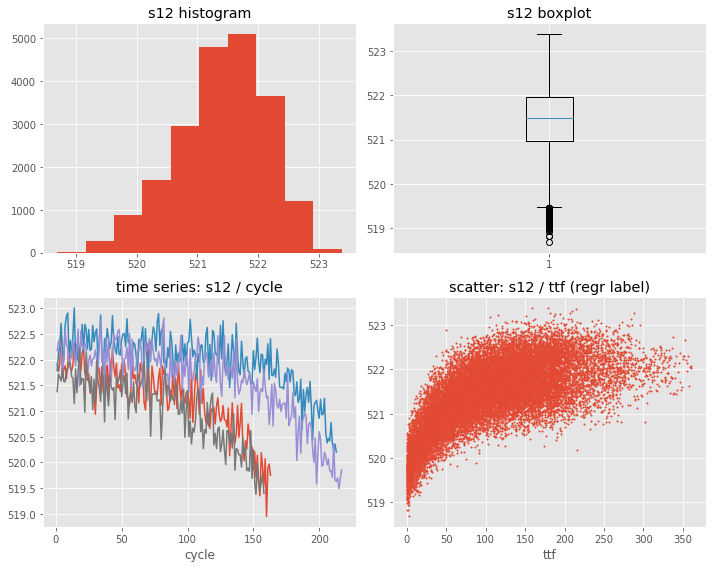

In [0]:
explore_col("s12", 4)

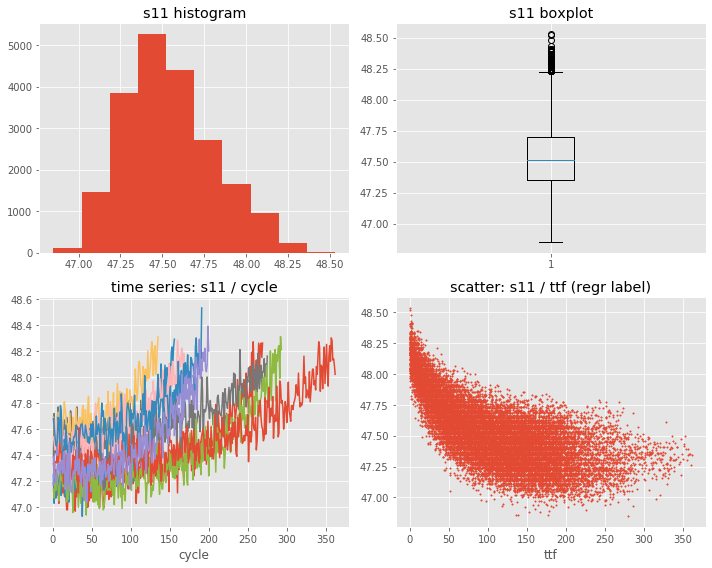

In [0]:
explore_col("s11", 10)

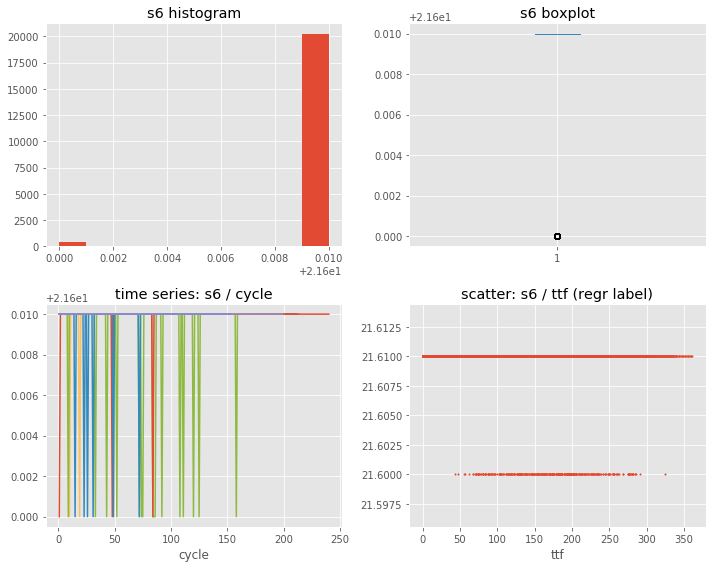

In [0]:
explore_col("s6", 10)

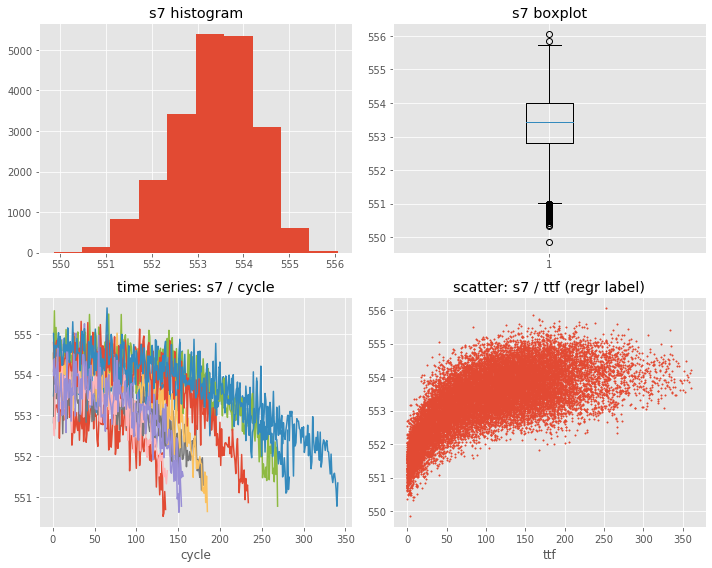

In [0]:
explore_col("s7", 10)

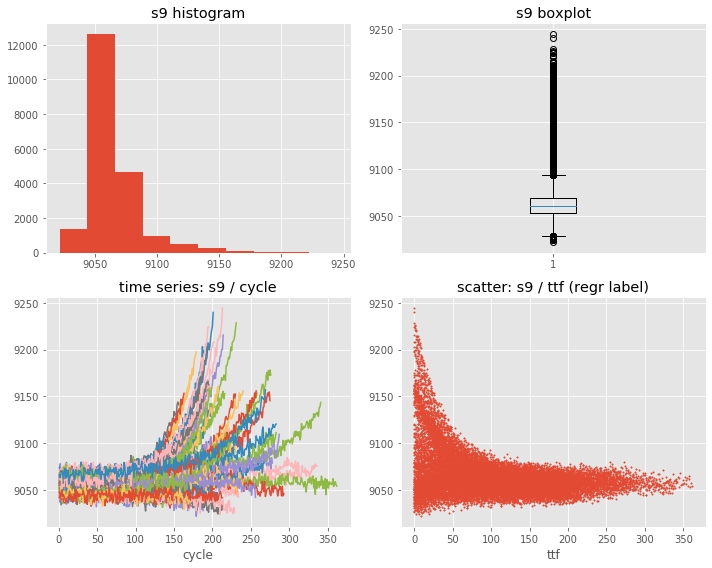

In [0]:
explore_col("s9", 100)

In [0]:
# 임의의 10개의 엔진에 대해서 시계열 플롯 그리기
def plot_time_series(s):    
    """임의의 10개의 엔진에 대해서 시계열 플롯 그리기
    
        Args:
        s (str): 센서 이름

    Returns:
        plots
        
    """
    
    fig, axes = plt.subplots(10, 1, sharex=True, figsize = (15, 15))
    fig.suptitle(s + ' time series / cycle', fontsize=15)
    
    #np.random.seed(12345)
    select_engines = np.random.choice(range(1,101), 10, replace=False).tolist()
    
    for e_id in select_engines:
        df = df_tr_lbl[['cycle', s]][df_tr_lbl.id == e_id]
        i = select_engines.index(e_id)
        axes[i].plot(df['cycle'],df[s])
        axes[i].set_ylabel('engine ' + str(e_id))
        axes[i].set_xlabel('cycle')
        #axes[i].set_title('engine ' + str(e_id), loc='right')

    #plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

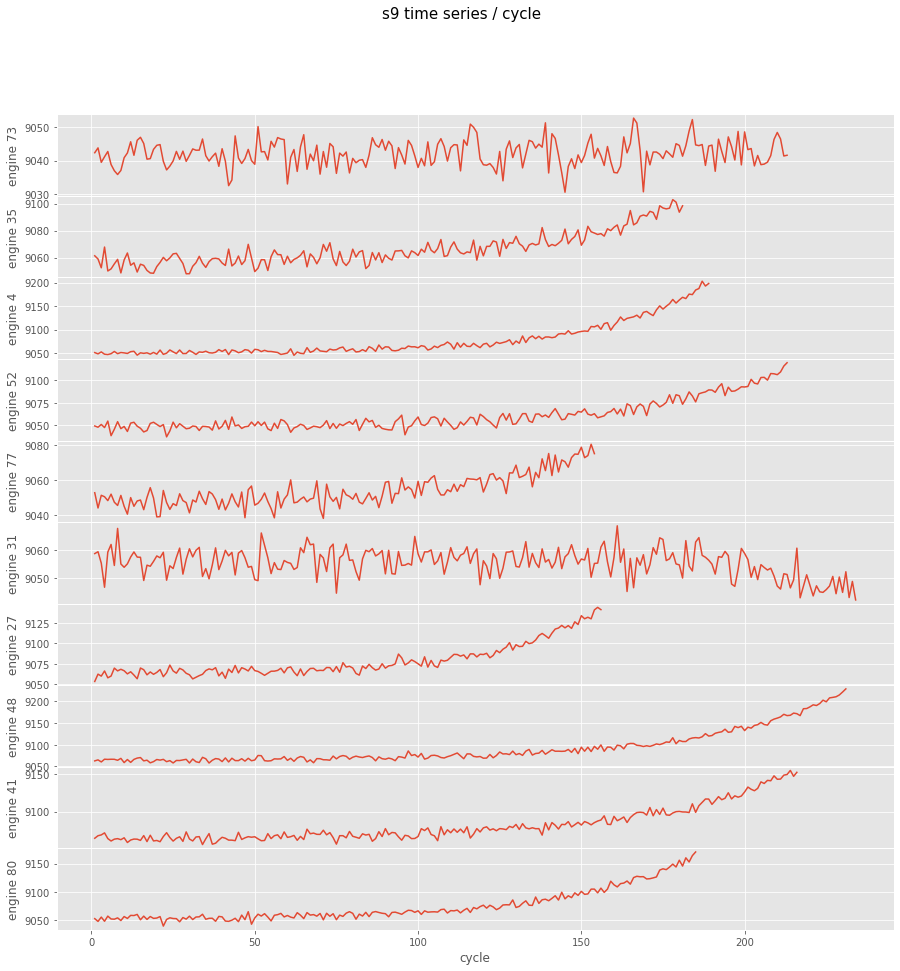

In [0]:
plot_time_series('s9')

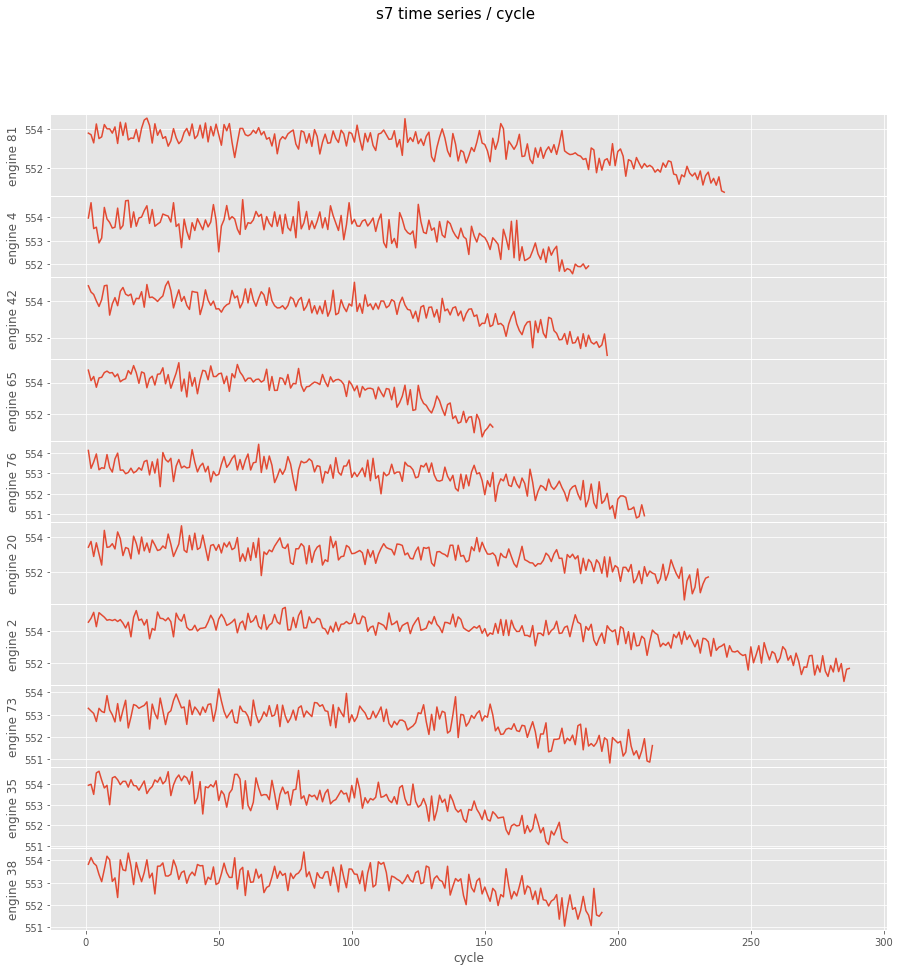

In [0]:
plot_time_series('s7')

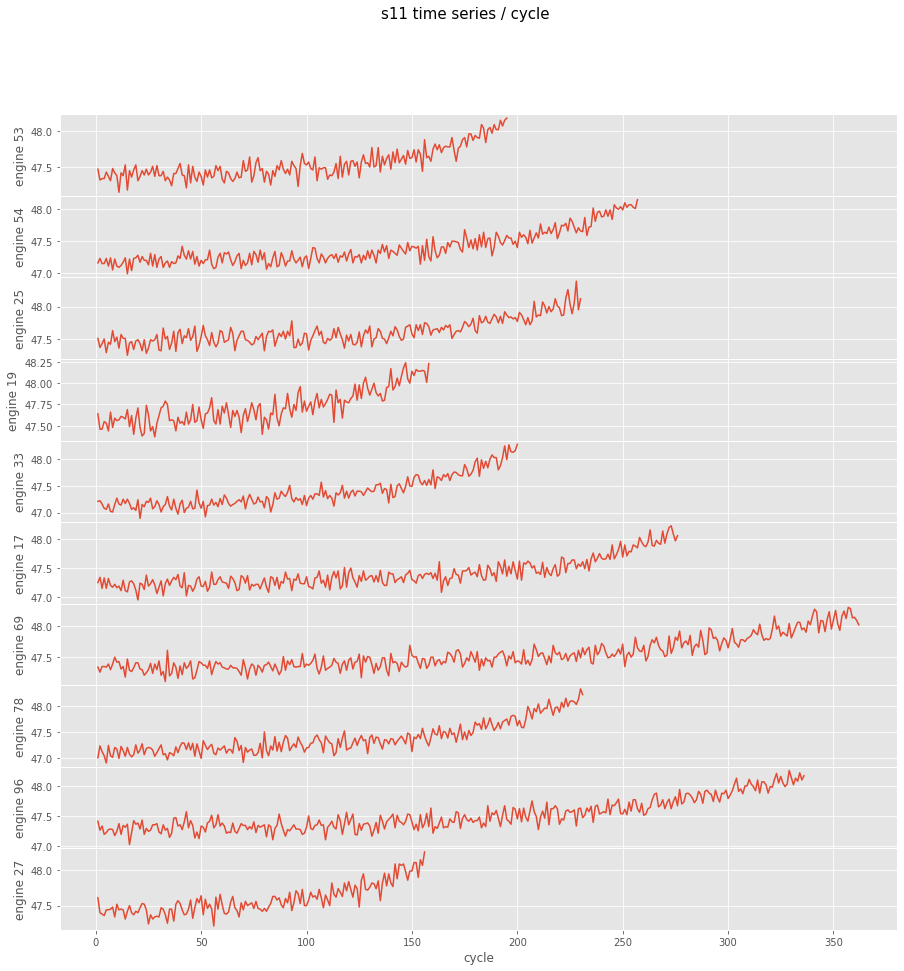

In [0]:
plot_time_series('s11')

### 분류 레이블 통계정보 보기

In [0]:
# 이진 분류의 레이블 분포 보기

print(df_tr_lbl['label_bnc'].value_counts())
print('\nNegaitve samples =  {0:.0%}'.format(df_tr_lbl['label_bnc'].value_counts()[0]/df_tr_lbl['label_bnc'].count()))
print('\nPosiitve samples =  {0:.0%}'.format(df_tr_lbl['label_bnc'].value_counts()[1]/df_tr_lbl['label_bnc'].count()))

0    17531
1     3100
Name: label_bnc, dtype: int64

Negaitve samples =  85%

Posiitve samples =  15%


- 비대칭 분포이므로 정확도만 봐서는 안된다.
- AUC, ROC 확인이 필요하다

In [0]:
# 다중 분류 레이블의 통계 보기

print(df_tr_lbl['label_mcc'].value_counts())
print('\nClass 0 samples =  {0:.0%}'.format(df_tr_lbl['label_mcc'].value_counts()[0]/df_tr_lbl['label_mcc'].count()))
print('\nClass 1 samples =  {0:.0%}'.format(df_tr_lbl['label_mcc'].value_counts()[1]/df_tr_lbl['label_mcc'].count()))
print('\nClass 2 samples =  {0:.0%}'.format(df_tr_lbl['label_mcc'].value_counts()[2]/df_tr_lbl['label_mcc'].count()))

0    17531
2     1600
1     1500
Name: label_mcc, dtype: int64

Class 0 samples =  85%

Class 1 samples =  7%

Class 2 samples =  8%
